<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "data/Sacramento_transactions.csv"
data = pd.read_csv(house_csv)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
data.shape

(985, 12)

In [4]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft'>

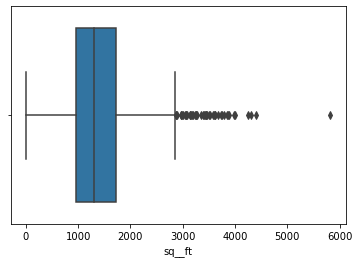

In [5]:
sns.boxplot(data['sq__ft'])

In [6]:
# count the condition
data['sq__ft'][(data['sq__ft'] == 0)].count()

171

In [7]:
# replace 0 with Null
data['sq__ft'] = np.where(data['sq__ft'] == 0, np.nan, data['sq__ft'])

In [8]:
# drop all outliers
data.dropna(inplace = True)

# count sq_ft == 0 again
data['sq__ft'][(data['sq__ft'] == 0)].count()

0

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft'>

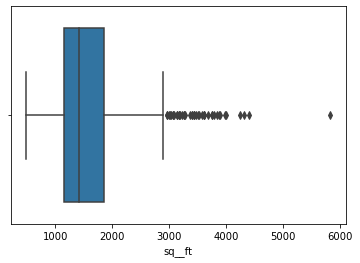

In [9]:
# check for outliers after drop all columns
sns.boxplot(data['sq__ft'])

In [10]:
# check upper and lower limit
lower_limit = data['sq__ft'].quantile(0.01)
upper_limit = data['sq__ft'].quantile(0.99)
print(lower_limit)
print(upper_limit)

699.38
3831.5


In [11]:
outliers = data[(data['sq__ft'] > upper_limit) | (data['sq__ft'] < lower_limit)]
outliers['sq__ft'].count()

18

In [12]:
# replace 18 outliers with Null
data['sq__ft'] = np.where(data['sq__ft'] > upper_limit, np.nan, data['sq__ft'])
data['sq__ft'] = np.where(data['sq__ft'] < lower_limit, np.nan, data['sq__ft'])
data['sq__ft'].isnull().sum()

18

In [13]:
# drop all outliers
data.dropna(inplace = True)
data['sq__ft'].isnull().sum()

0

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [14]:
# ANSWER
# price - it determine by all features 

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [15]:
# ANSWER
# sq__ft - bigger house > higher price
# baths - more baths > higher price sometimes
# beds - more bedrooms > higher price

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

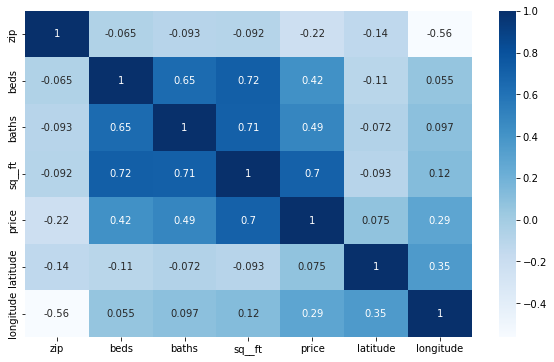

In [16]:
# ANSWER
data_corr = data.corr()

# determine figure size
plt.figure(figsize = (10,6))

# Create heatmap
sns.heatmap(data_corr, annot=True, cmap="Blues")

# Show figure
plt.show()

In [17]:
# high correlation features to the target
print(data.corr().abs().nlargest(4, 'price').index)

Index(['price', 'sq__ft', 'baths', 'beds'], dtype='object')


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [18]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [19]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
y = data['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [20]:
# ANSWER
from sklearn.metrics import mean_squared_error, r2_score

### 3. Splitting Data

In [21]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [22]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [23]:
X_test

array([[ 864.],
       [1418.],
       [1420.],
       [1103.],
       [1362.],
       [1428.],
       [1516.],
       [1348.],
       [1401.],
       [1857.],
       [1586.],
       [ 840.],
       [1144.],
       [2162.],
       [1209.],
       [1324.],
       [1450.],
       [1382.],
       [ 904.],
       [1549.],
       [2447.],
       [2161.],
       [2214.],
       [ 970.],
       [1457.],
       [1152.],
       [1108.],
       [1112.],
       [1406.],
       [1740.],
       [1522.],
       [1478.],
       [1593.],
       [2592.],
       [1304.],
       [ 901.],
       [2606.],
       [ 836.],
       [1477.],
       [ 888.],
       [2687.],
       [1284.],
       [1266.],
       [1252.],
       [2111.],
       [1360.],
       [2550.],
       [1524.],
       [1202.],
       [2155.],
       [1900.],
       [2213.],
       [2960.],
       [1094.],
       [1516.],
       [1144.],
       [ 804.],
       [2356.],
       [1007.],
       [1080.],
       [1292.],
       [2025.],
       [

#### 3.2 Check Shape, Sample of Test Train Data

In [24]:
# ANSWER
## Check training/test data
print('shape of X_train is ', X_train.shape)
print('shape of y_train is ', y_train.shape)
print('shape of X_test is ', X_test.shape)
print('shape of y_test is ', y_test.shape)
print('')
print('shape of X_train is ', np.random.randint(X_train, size = (1)))
print('shape of y_train is ', np.random.choice(y_train, size=1))
print('shape of X_test is ', np.random.randint(X_test, size = (1)))
print('shape of y_test is ', np.random.choice(y_test, size=1))

shape of X_train is  (533, 1)
shape of y_train is  (533,)
shape of X_test is  (263, 1)
shape of y_test is  (263,)

shape of X_train is  [658]
shape of y_train is  [470000]
shape of X_test is  [363]
shape of y_test is  [600000]


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [25]:
# ANSWER
# model:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# ANSWER

# get y predictor 
y_pred = model.predict(X_test) 

# calculate R^2 
print("R^2 = %0.5f" % r2_score(y_test, y_pred))

R^2 = 0.41759


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [27]:
# ANSWER
model.predict([[1204]])

array([175225.68195149])

#### Find the error

In [28]:
# Predict price from X_test
data['price'][(data['street'] == '1140 EDMONTON DR')]


930    174250
Name: price, dtype: int64

In [29]:
print(182611.9071335 - 174250 )

8361.907133500004




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



